<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Diagnóstico de Modelos

## Cálculo da Matriz de Confusão e métricas Precision, Recall e F1 Score em problemas de classificação

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('base_auc.csv',sep=';')
df.head()

,Y_Real,Prob(Y=1)
0,0,0.067973
1,0,0.154001
2,1,0.783866
3,0,0.507662
4,0,0.103317


In [5]:
# Definindo o corte de probabilidade para definir o Y Predito
corte = 0.5
Y_Predito = np.where(df['Prob(Y=1)'] >= corte, 1 , 0)

In [6]:
Y_Predito

array([0, 0, 1, ..., 0, 0, 0])

### Matriz de Confusão

In [7]:
# Pacote que cria a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [8]:
cm = confusion_matrix(df['Y_Real'], Y_Predito)
cm

array([[3400,  400],
       [ 300,  100]])

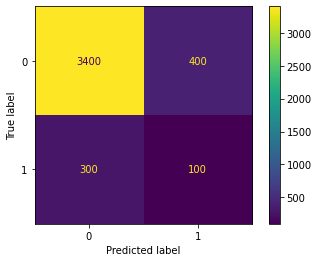

In [9]:
ConfusionMatrixDisplay(confusion_matrix=cm,).plot();

### Precision, Recall e F1 Score

In [10]:
# Pacote para calcular as métricas da matriz de confusão
from sklearn.metrics import classification_report

In [11]:
print(classification_report(df['Y_Real'],Y_Predito))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      3800
           1       0.20      0.25      0.22       400

    accuracy                           0.83      4200
   macro avg       0.56      0.57      0.56      4200
weighted avg       0.85      0.83      0.84      4200



Para o corte padrão de probabilidade 0,5, interpretamos:

- **Precision:** 0,20 >> De todas as linhas que o modelo classificou como 1, 20% realmente eram 1.<br>
- **Recall:** 0,25 >> De todas as linhas que realmente eram 1, o modelo classificou como 1 apenas 25%.